In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import random
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
dataframe = pd.read_csv('../dataset/final_dataset.csv')
dataframe.head(10)

,Unnamed: 0,Time,Day ahead forecast,Hour ahead forecast,Current demand,Time.1,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other
0,0,00:00,23437.0,22290.0,22216.0,00:00,0.0,2810.0,993.0,380.0,225.0,200.0,11.0,2273.0,7326.0,1924.0,6.0,6254.0,0.0
1,1,00:05,22363.0,22089.0,22106.0,00:05,0.0,2862.0,993.0,381.0,226.0,201.0,11.0,2273.0,7200.0,1866.0,65.0,6266.0,0.0
2,2,00:10,22363.0,22089.0,22130.0,00:10,0.0,2916.0,993.0,380.0,226.0,202.0,11.0,2272.0,7057.0,1849.0,64.0,6319.0,0.0
3,3,00:15,22363.0,22089.0,22040.0,00:15,0.0,2920.0,993.0,378.0,223.0,203.0,11.0,2272.0,7007.0,1827.0,25.0,6354.0,0.0
4,4,00:20,22363.0,21867.0,21963.0,00:20,0.0,2902.0,993.0,379.0,223.0,203.0,11.0,2273.0,6970.0,1840.0,32.0,6360.0,0.0
5,5,00:25,22363.0,21867.0,21867.0,00:25,0.0,2874.0,992.0,379.0,223.0,205.0,11.0,2271.0,6926.0,1840.0,25.0,6302.0,0.0
6,6,00:30,22363.0,21867.0,21792.0,00:30,0.0,2845.0,993.0,379.0,223.0,203.0,11.0,2273.0,6919.0,1845.0,38.0,6270.0,0.0
7,7,00:35,22363.0,21626.0,21731.0,00:35,0.0,2807.0,993.0,378.0,224.0,203.0,11.0,2273.0,6885.0,1843.0,40.0,6263.0,0.0
8,8,00:40,22363.0,21626.0,21666.0,00:40,0.0,2763.0,992.0,377.0,224.0,198.0,11.0,2274.0,6789.0,1831.0,34.0,6338.0,0.0
9,9,00:45,22363.0,21626.0,21624.0,00:45,0.0,2735.0,992.0,377.0,218.0,197.0,11.0,2273.0,6761.0,1902.0,33.0,6352.0,0.0


In [4]:

batch_size = 288
dataframe = dataframe.loc[:,['Day ahead forecast', 'Hour ahead forecast', 'Current demand', 'Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas', 'Small hydro', 'Coal', 'Nuclear', 'Natural gas', 'Large hydro', 'Batteries', 'Imports', 'Other']]

columns = dataframe.columns

# New split dataset
day_split_dataset = pd.DataFrame(columns=columns)

for column in columns:
    counter = 0
    # Getting data of each column
    data = dataframe.loc[:,column]
    # Spliting data per day 
    mini_batches = [data[k: k + batch_size] for k in range(0, len(data), batch_size)]
    for mini_batch in mini_batches:
        # For every batch and column find mean and place it in new dataset
        mean = np.round(mini_batch.mean(), 2)
        day_split_dataset.at[counter, column] = mean
        counter += 1

day_split_dataset.head(10)
# day_split_dataset.shape

,Day ahead forecast,Hour ahead forecast,Current demand,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other
0,22097.56,21804.5,21812.47,2507.79,1426.83,988.21,380.07,211.52,221.0,13.03,2273.53,6589.8,1859.85,1.33,5475.11,0.0
1,25159.39,24026.33,24134.61,2540.55,350.12,986.46,374.85,226.66,226.36,13.18,2271.85,0.0,1881.89,-4.77,6988.87,0.0
2,24603.15,24494.01,24751.85,2573.57,423.15,986.43,340.07,229.37,200.34,13.75,2269.74,8026.52,1756.77,0.95,8099.68,0.0
3,24036.92,24134.9,24432.81,2545.8,298.84,987.02,274.33,229.12,196.13,13.95,2271.33,8032.13,1772.36,-4.38,7947.94,0.0
4,22854.77,23764.7,23862.24,511.89,926.0,985.5,281.93,227.72,189.26,12.4,2271.35,8649.96,1558.91,-6.47,8490.59,0.0
5,22390.42,22342.42,22532.0,1699.65,2014.67,989.34,295.67,227.58,225.86,11.97,2268.46,6018.71,1304.5,-3.78,7771.94,0.0
6,23930.45,24158.45,24016.25,1971.54,1282.9,908.22,230.39,212.96,211.55,12.18,2266.41,7988.74,1497.57,0.58,7669.98,0.0
7,24460.03,24033.76,24008.79,1751.43,539.59,872.71,308.67,208.24,200.81,12.49,2263.78,9645.87,1269.86,-6.67,7221.62,0.0
8,24194.75,23871.38,23849.47,1792.06,940.23,873.79,324.11,223.9,257.35,12.62,2261.83,8523.1,1416.79,-2.53,7489.9,0.0
9,23770.01,23743.66,23719.04,2218.25,868.69,884.13,343.8,225.59,265.21,12.98,2261.29,7887.16,1440.48,4.2,7569.18,0.0


In [5]:


new_dataset = TSNE(n_components=2, perplexity=5, n_iter=1000).fit_transform(day_split_dataset)
new_dataframe = pd.DataFrame(new_dataset, columns=['component_1', 'component_2'])

# scaled_dataset = StandardScaler().fit_transform(day_split_dataset)
# pca = PCA(2)
# new_dataset = pca.fit_transform(scaled_dataset)
# new_dataframe = pd.DataFrame(new_dataset, columns=['principal_1', 'principal_2'])

new_dataframe.head(10)


c:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,component_1,component_2
0,-48.754105,37.177063
1,59.403591,-25.962263
2,21.000990,73.946404
3,20.907394,74.546463
4,30.927797,73.684273
5,-14.260410,63.049095
6,28.207445,73.586693
7,44.020679,58.127140
8,28.783419,73.000740
9,26.658390,73.456573


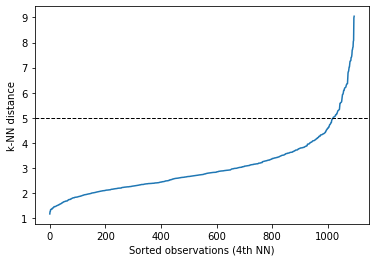

In [6]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
neighbors = NearestNeighbors(n_neighbors=5).fit(new_dataframe)
# Find the k-neighbors of a point
neighbor_distance, neighbor_index = neighbors.kneighbors(new_dataframe)

sorted_neighbor_distance = np.sort(neighbor_distance, axis=0)

k_distance = sorted_neighbor_distance[:,4]

plt.plot(k_distance)
plt.axhline(y=5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [7]:
clusters = DBSCAN(eps=5, min_samples=4).fit(new_dataframe)
set(clusters.labels_)


{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54}

In [8]:
Counter(clusters.labels_)

Counter({0: 9,
         1: 38,
         2: 95,
         3: 25,
         4: 18,
         5: 36,
         6: 15,
         7: 5,
         -1: 20,
         8: 12,
         9: 4,
         10: 5,
         11: 20,
         12: 29,
         13: 8,
         14: 20,
         15: 10,
         16: 8,
         17: 35,
         18: 16,
         19: 4,
         20: 21,
         21: 4,
         22: 60,
         23: 13,
         24: 6,
         25: 9,
         26: 12,
         27: 45,
         28: 28,
         29: 41,
         30: 12,
         31: 11,
         32: 21,
         33: 29,
         34: 46,
         35: 14,
         36: 30,
         37: 16,
         38: 4,
         39: 10,
         40: 6,
         41: 28,
         42: 12,
         43: 24,
         44: 18,
         45: 30,
         46: 26,
         47: 15,
         48: 4,
         49: 10,
         50: 4,
         51: 5,
         52: 17,
         53: 24,
         54: 9})

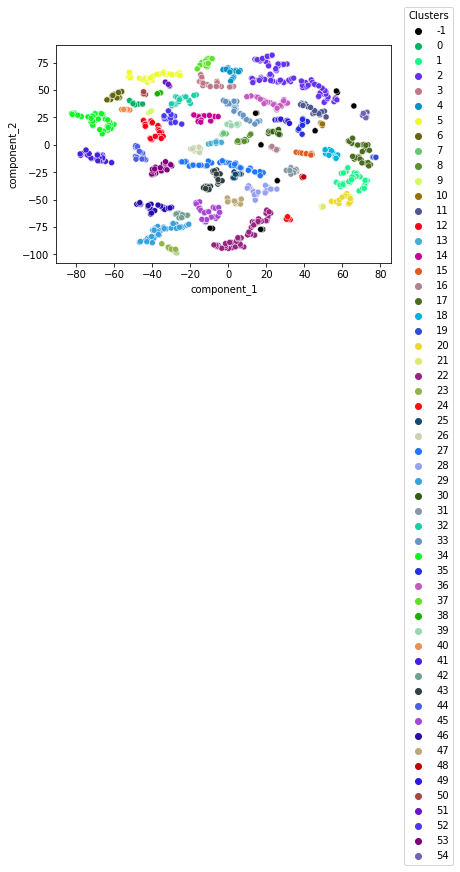

In [9]:
color_list = ['black']
for n_colors in range(len(set(clusters.labels_)) - 1):
    hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    color_list.append(hexadecimal)

    
plot = sns.scatterplot(data=new_dataframe, x='component_1', y='component_2', hue=clusters.labels_, legend='full', palette=color_list)
sns.move_legend(plot, 'upper right', bbox_to_anchor=(1.2, 1.2), title='Clusters')
plt.show()

ValueError: boxplot method requires numerical columns, nothing to plot.

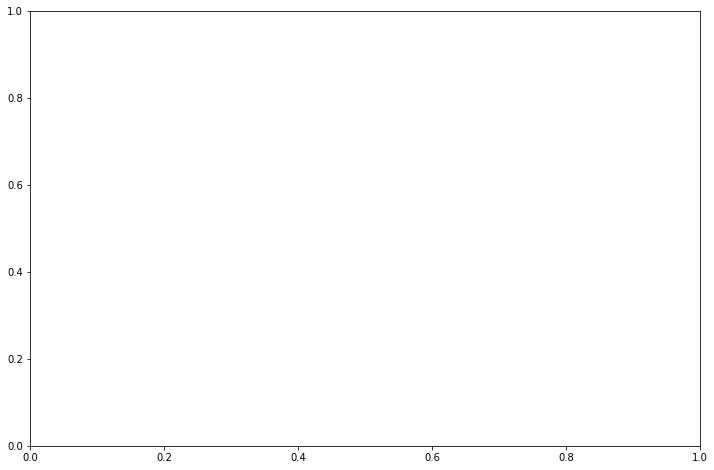